In [47]:
import numpy as np
import matplotlib.pyplot as plt
import numba 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


In [48]:
def accel_majorStars(pos: np.ndarray, G : float, M : float):
    n = 2 # number of major mass body
    A_pos = pos[0]
    B_pos = pos[1]
    a = np.zeros((n, 3)) # acceleration array

    r_vec = A_pos - B_pos 
    r_mag = np.linalg.norm(r_vec) 
    acc = -(G*M*r_vec/r_mag**3)
    A_acc = acc # accel of mass body A
    B_acc = -acc # accel of mass body B

    a[0] = A_acc 
    a[1] = B_acc
    return a 

def accel_satellites(pos_satellites: np.ndarray, pos_majorStars: np.ndarray, G: float, M: float):
    n = pos_majorStars[:,0].size # number of major masses
    m = pos_satellites[:,0].size # number of satellites
    a = np.zeros((m, 3))

    for i in range(n):
        for j in range(m):
            r_vec = pos_satellites[j] - pos_majorStars[i] 
            r_mag = np.linalg.norm(r_vec) 
            a[j] = a[j] + (-G*M*r_vec/r_mag**3)


    return a

def leapfrog(r_star: np.ndarray, v_star: np.ndarray, r_satellites: np.ndarray, v_satellites: np.ndarray, dt: float, G: float, M: float):

    # major stars leapfrog
    v_star = v_star+ 0.5*dt*accel_majorStars(r_star, G, M)
    r_star = r_star+ v_star*dt
    v_star = v_star+ 0.5*dt*accel_majorStars(r_star, G, M)

    # satellites leapfrog
    v_satellites = v_satellites + 0.5*dt*accel_satellites(r_satellites, r_star, G, M)
    r_satellites = r_satellites + v_satellites*dt
    v_satellites = v_satellites + 0.5*dt*accel_satellites(r_satellites, r_star, G, M)

    return r_star, v_star,r_satellites, v_satellites

In [61]:
# Constants
G = 4491.9 # kpc^3/(M * T)
M = 1 # 10^11 solar mass
dt = 0.1 # 1 T = 10^8 years
T = 17 # total time in earth_year
step = int(T/dt) # total number of steps, should be INT
L_scale = 1 # kpc

# reading initialization from csv files
# and convert to numpy vectors
df_comp = pd.read_csv('comp.csv')
df_center = pd.read_csv('mass.csv')

# output container (currently using python.List)
out_star = [] 
out_satellite = []

# converting position and velocity to np.narray
position_star = df_center[['x', 'y', 'z']].to_numpy()
velocity_star = df_center[['v_x', 'v_y', 'v_z']].to_numpy()
position_satellite = df_comp[['x', 'y', 'z']].to_numpy()
velocity_satellite= df_comp[['v_x', 'v_y', 'v_z']].to_numpy()

print(position_star)
print(velocity_star)

# store initial
out_star.append(position_star)
out_satellite.append(position_satellite)


test = 0 # debug use

# time evolution 
for i in range(int(step)):
    position_star, velocity_star, position_satellite, velocity_satellite = leapfrog(position_star, velocity_star, position_satellite, velocity_satellite, dt = dt, G = G, M = M)
    if i == 20:
        test = position_satellite
    out_star.append(position_star)
    out_satellite.append(position_satellite)

out_star = np.array(out_star)
out_satellite = np.array(out_satellite)
star = out_star.reshape((step+1)*2,3)

[[-87.5 -40.    0. ]
 [-12.5  40.    0. ]]
[[  5.99459757   8.99189635   0.        ]
 [-23.97839027  -8.99189635   0.        ]]


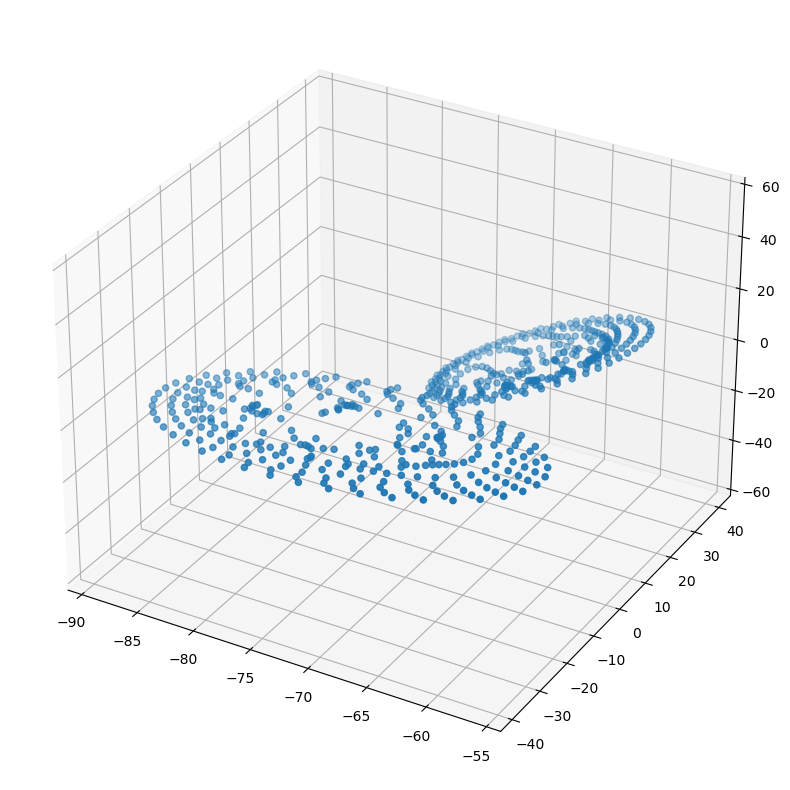

In [62]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection = '3d')

ax.scatter3D(test[:,0], test[:,1], test[:,2])
ax.set_zlim(-60,60)

plt.savefig('test.png')

In [51]:
# # Create the figure and axes for the plot
# fig = plt.figure(figsize=(12,10))
# ax = fig.add_subplot(111, projection='3d')


# x = star[:,0]
# print(x)
# y = star[:,1]
# z = star[:,2]
# ax.view_init(90, -90, 0)
# # Create the initial point in the plot
# point, = ax.plot(x[0], y[0], z[0], 'bo')

# # Define the update function for the animation
# def update(frame):
#     # Update the position of the point
#     point.set_data(x[frame:frame+2], y[frame:frame+2])
#     point.set_3d_properties(z[frame:frame+2])
#     return point,

# # Create the animation object
# anim = FuncAnimation(fig, update, frames = len(x), blit=True, interval = 50)

# ax.set_xlabel("x (kpc)")
# ax.set_ylabel("y (kpc)")
# ax.set_zlabel("z (kpc)")
# ax.set_xlim(-50, 50)
# ax.set_ylim(-50, 50)
# ax.set_zlim(-50, 50)
# ax.set_title('Mice Collision')
# # Show the plot
# plt.legend()
# plt.show()

In [52]:
r = np.array([[1,2,3],[1,2,3]])
r_norm = r/np.linalg.norm(r, axis=1)[:,None]
np.linalg.norm(r_norm, axis=1)

array([1., 1.])